In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [133]:
data=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [134]:
data.drop('customerID',inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [135]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
col=data.columns
for _ in col:
    print(_, data[_].unique(),sep='   ',end='\n')

gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2

In [137]:
from sklearn.preprocessing import LabelEncoder
ele=LabelEncoder()

In [138]:
import category_encoders as ce

In [139]:
data['Churn']=data['Churn'].astype('category')
data['Churn']=ele.fit_transform(data['Churn'])
for _ in col:
    if data[_].dtype=='object':
        data[_]=data[_].astype('category')
        encoder = ce.TargetEncoder(_)
        data[_] = encoder.fit_transform(data[_], data["Churn"])

In [140]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.269209,0,0.196649,0.312791,1,0.249267,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.452854,29.85,0.230843,0
1,0.261603,0,0.329580,0.312791,34,0.267096,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0.336804,0.112695,0.163301,0.191067,56.95,0.230843,0
2,0.261603,0,0.329580,0.312791,2,0.267096,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.191067,53.85,0.360951,1
3,0.261603,0,0.329580,0.312791,45,0.249267,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0.336804,0.112695,0.163301,0.167098,42.30,0.230843,0
4,0.269209,0,0.329580,0.312791,2,0.267096,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.452854,70.70,0.360951,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.261603,0,0.196649,0.154502,24,0.267096,0.286099,0.189591,0.146112,0.399288,0.225021,0.151663,0.300702,0.299414,0.112695,0.335651,0.191067,84.80,0.230843,0
7039,0.269209,0,0.196649,0.154502,72,0.267096,0.286099,0.418928,0.417667,0.215315,0.225021,0.416355,0.300702,0.299414,0.112695,0.335651,0.152431,103.20,0.230843,0
7040,0.269209,0,0.196649,0.154502,11,0.249267,0.249267,0.189591,0.146112,0.399288,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.452854,29.60,0.230843,0
7041,0.261603,1,0.196649,0.312791,4,0.267096,0.286099,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.191067,74.40,0.360951,1


In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

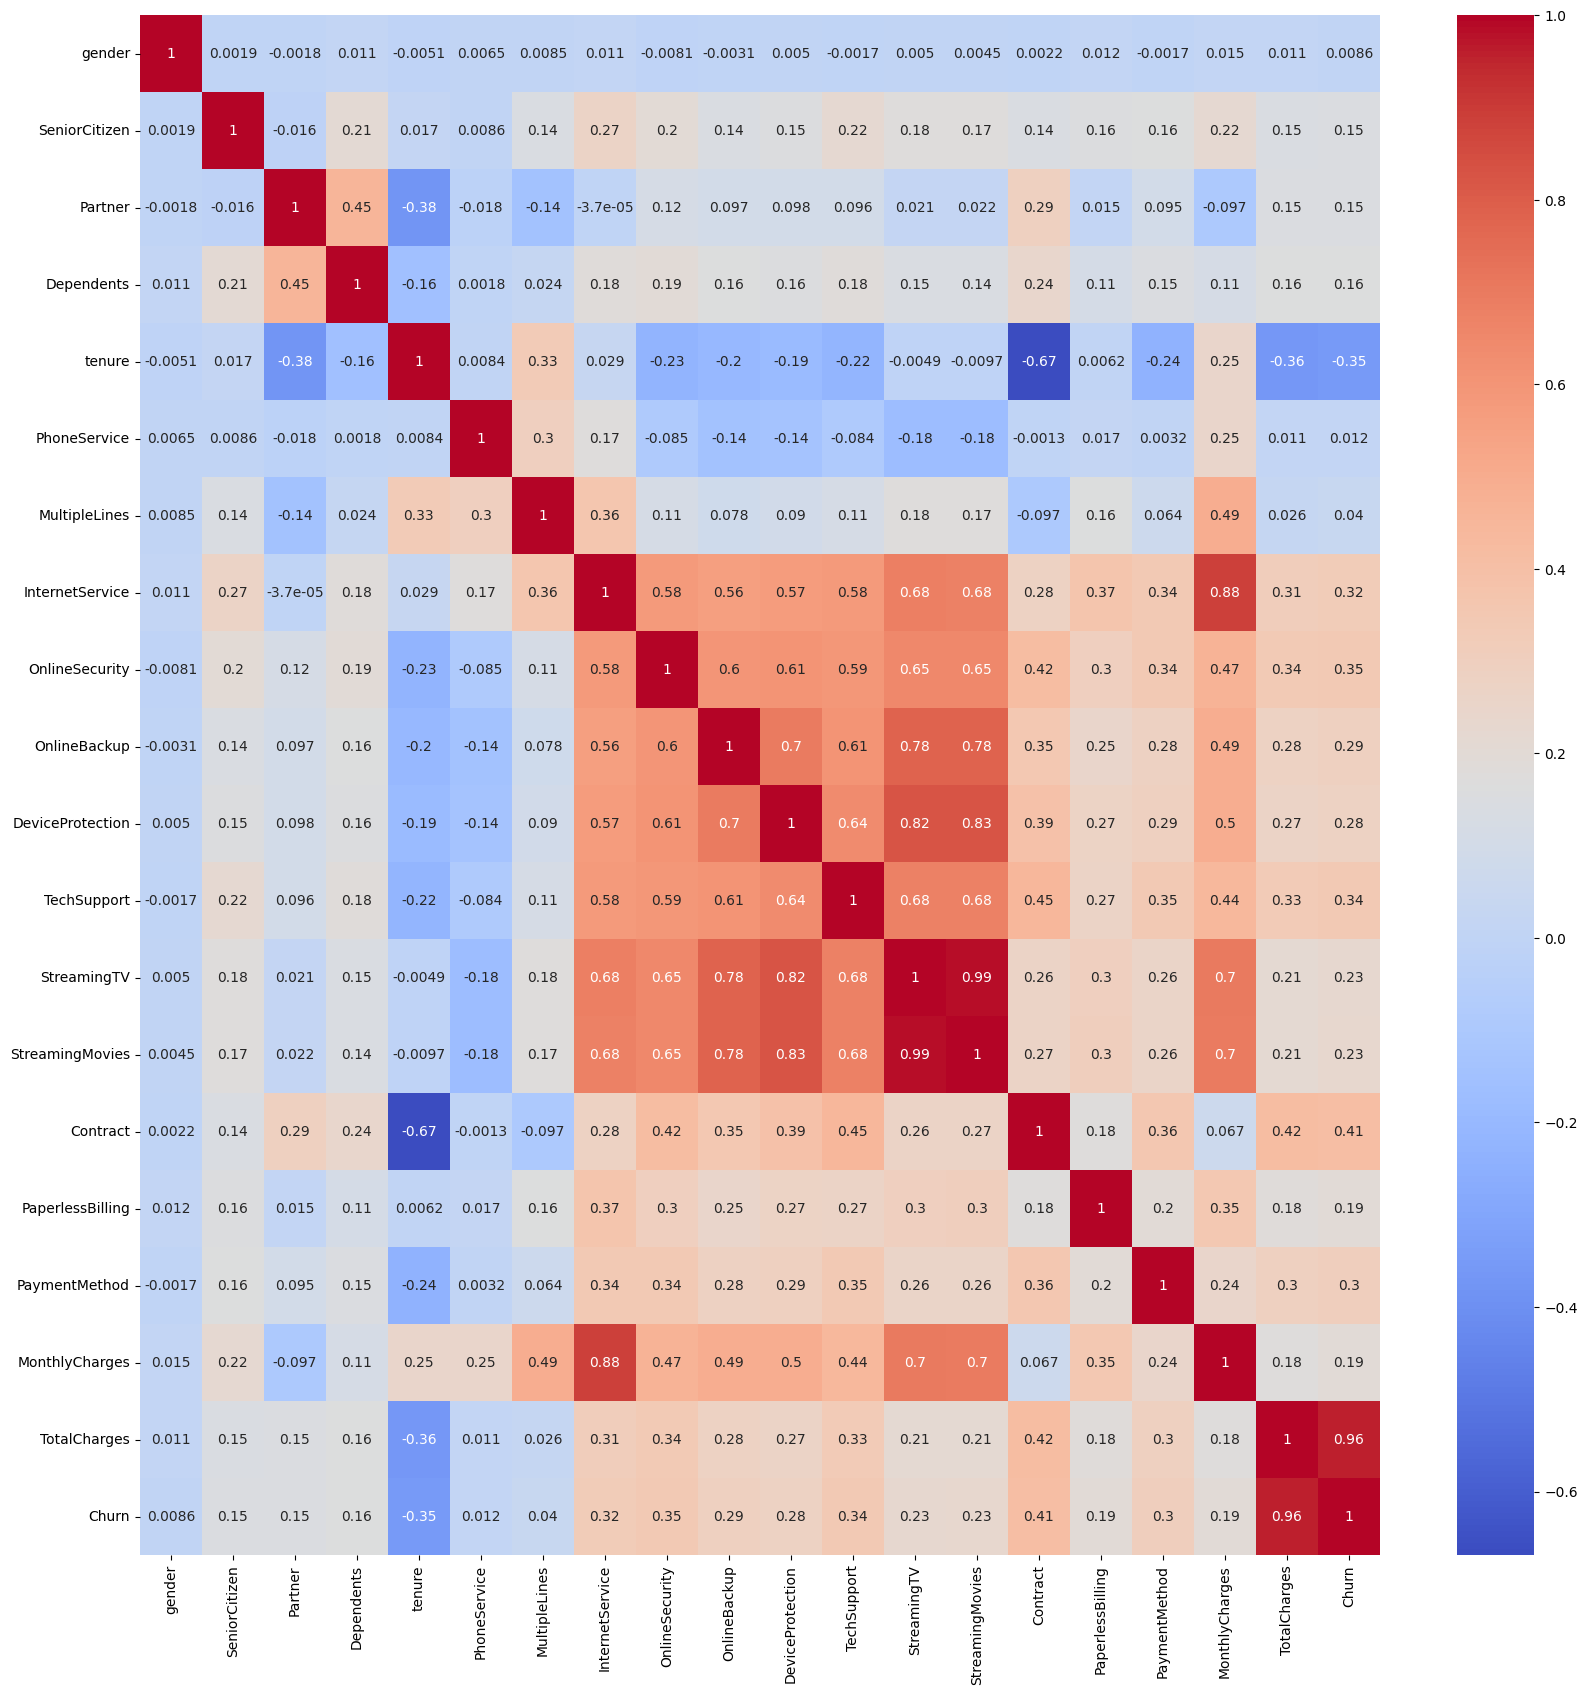

In [142]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.plot()

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [145]:
x=data.drop(columns=['Churn','StreamingMovies'],axis=1)
y=data['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [146]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [147]:
y_pred=model.predict(x_test)

In [148]:
from sklearn.metrics import f1_score
score=f1_score(y_test,y_pred)
score

0.9500000000000001

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

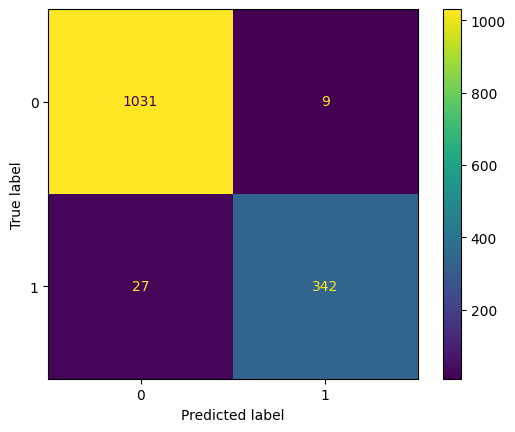

In [150]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [151]:
import shap

In [152]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_train)

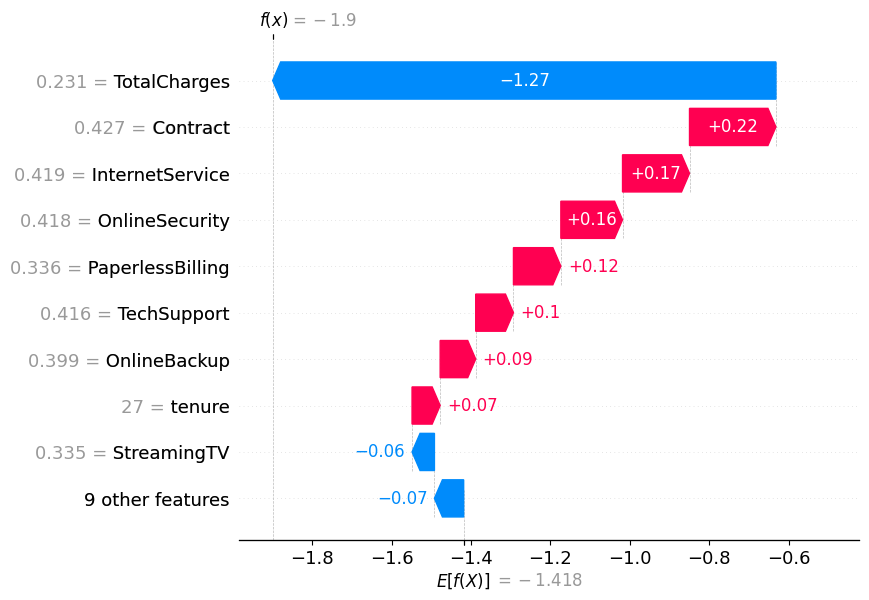

In [153]:
shap.waterfall_plot(shap_values[0])

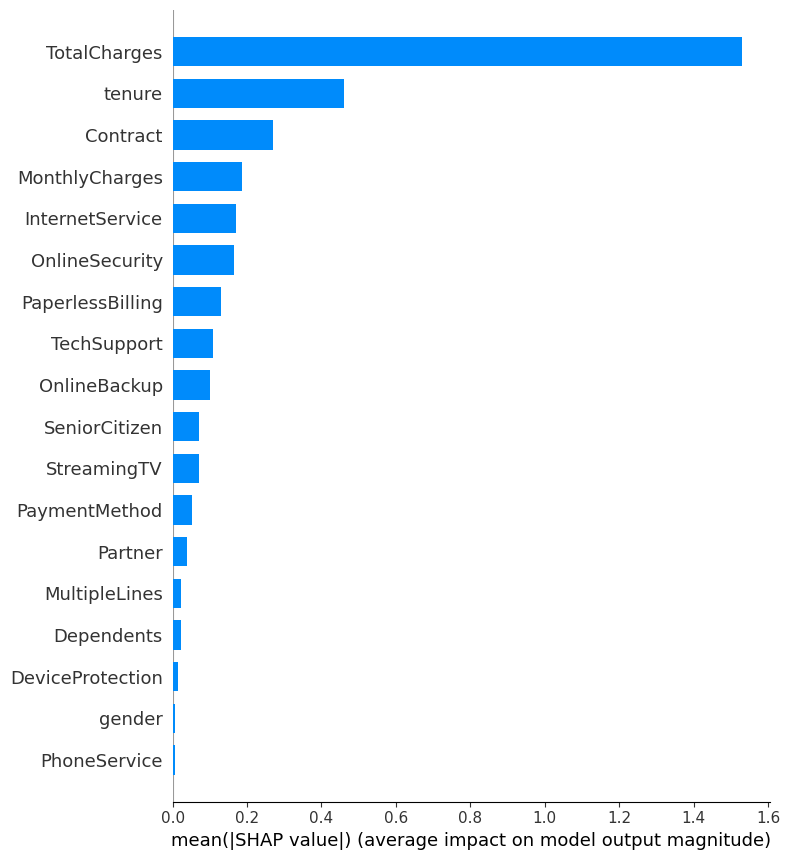

In [154]:
shap.summary_plot(shap_values, x_test, plot_type="bar")